<a href="https://colab.research.google.com/github/JoHussien/DSPAssignments/blob/main/InvestigateDatasetProject/NoShowAppointmentsDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome to the Investigate a Dataset project! This project is part of the Data Analysis Professional Nanoderee offered through Udacity platform and supported by eFWD Scholarship [Data Professional Track]

# Project: Investigate a Dataset - No Show Appointments Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>The dataset we are analysing throughout this notebook is the "Medical Appointment No Shows" dataset that is available over [Kaggle](https://www.kaggle.com/joniarroba/noshowappointments). 
This dataset contains 110.527 medical appointments with each appointment has its 14 associated variables (characteristics). The most important one if the patient show-up or no-show to the appointment.

> List of attributes "Characteristics of the dataset":
**bold text**

  1.   PatientId: Identification of a patient
  2.   AppointmentID: Identification of each appointment
  3. Gender:Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
  4. ScheduledDay: The day of the actuall appointment, when they have to visit the doctor.
  5. AppointmentDay: The day someone called or registered the appointment, this is before appointment of course.
  6. Age: How old is the patient.
  7. Neighbourhood: Where the appointment takes place.
  8. Scholarship: True of False. It indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.Observation, this is a broad topic, consider reading this [article](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia) 
  9. Hipertension: True or False
  10. Diabetes: True or False
  11. Alcoholism: True or False
  12. Handcap: True or False
  13. SMS_received: 1 or more messages sent to the patient.
  14. No-show: True or False










### Question(s) for Analysis

1. Does a certain gender influence whether one shows up to appointments or not?
2. Does certain age group have high influence whether one shows up to appointments or not? If yes, what will it be?
3. Does alcoholic people have higher tendency to show up or not?
4. Does Diabetic people show up for their appoinments or not ?

>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt

In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

The next step is to get the data from my drive, as I am working on Google colab. So please feel free to ignore it and assume that you have the data stored on your machine.

In [ ]:
#Mount the drive to get the data
#mount Google drive
from google.colab import drive
drive.mount("/content/drive")
#Print the contents of the respective folder in my drive
!ls "drive/My Drive/udacityProjects/InvestigateDatasetProject/data"
# a variable to store the location of my data file
file_path = "drive/My Drive/udacityProjects/InvestigateDatasetProject/data/noshowappointments-kagglev2-may-2016.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
noshowappointments-kagglev2-may-2016.csv


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**




Get the data and explore some of its main properities

In [ ]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
my_data = pd.read_csv(file_path)
#print the first few lines of my dataset
print("The first five rows of my data is:")
print(my_data.head())


The first five rows of my data is:
      PatientId  AppointmentID Gender  ... Handcap SMS_received  No-show
0  2.987250e+13        5642903      F  ...       0            0       No
1  5.589978e+14        5642503      M  ...       0            0       No
2  4.262962e+12        5642549      F  ...       0            0       No
3  8.679512e+11        5642828      F  ...       0            0       No
4  8.841186e+12        5642494      F  ...       0            0       No

[5 rows x 14 columns]


Print the names of the columns of the dataset and their properities

In [ ]:
#getting the size of the dataset
print("Shape of the dataset is ",my_data.shape)
#Print the names of the columns of the dataset and some information about my dataset
print(my_data.info())

# We have five columns of 'object' dtype and thus we need to understand the columns of 'object' dtype and thus they need further exploration
print("Type of \'ScheduledDay\' {}".format(type(my_data['ScheduledDay'][0])))
print("Type of \'Gender\' {}".format(type(my_data['Gender'][0])))
print("Type of \'AppointmentDay  \' {}".format(type(my_data['AppointmentDay'][0])))
print("Type of \'Neighbourhood   \' {}".format(type(my_data['Neighbourhood'][0])))
print("Type of \'No-show\' {}".format(type(my_data['No-show'][0])))

Shape of the dataset is  (110527, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB
None
Type of 'ScheduledDay' <class 'str'>
Type of 'Gender' <class 'str'>
Type of 'AppointmentDay  ' <class 'str'>
Type of 'Neighbourhood   ' <class 'str'>
Type of 'No-show' <class 'str'>


**So from the above data it seams that:**
1. We don't have empty entries or null entries for ant of the 14 attributes of the 110527 data points
2. The datatypes are either integer, float or string
3. Some of the string attributes need to be casted into an integer datatype representing that string.

Looking at some general properities of each column of the dataset

In [ ]:
#Looking at the description of the dataset, i.e looking at some properities for each column
print("Investigating some properities of each column of the data:\n",my_data.describe())


Investigating some properities of each column of the data:
           PatientId  AppointmentID  ...        Handcap   SMS_received
count  1.105270e+05   1.105270e+05  ...  110527.000000  110527.000000
mean   1.474963e+14   5.675305e+06  ...       0.022248       0.321026
std    2.560949e+14   7.129575e+04  ...       0.161543       0.466873
min    3.921784e+04   5.030230e+06  ...       0.000000       0.000000
25%    4.172614e+12   5.640286e+06  ...       0.000000       0.000000
50%    3.173184e+13   5.680573e+06  ...       0.000000       0.000000
75%    9.439172e+13   5.725524e+06  ...       0.000000       1.000000
max    9.999816e+14   5.790484e+06  ...       4.000000       1.000000

[8 rows x 9 columns]


We need to make sure again that we don't have any null entries in any of the data points and thus we do this further step


In [ ]:
print("The number of null values per column",my_data.isnull().sum())

The number of null values per column PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64



So, Yes there is no null values in any of the 14 columns as agreed upon before. 

Now we will look at the last attirbute 'No-show' and see the count of values of each value type.

In [ ]:
print("Count for each 'No-show' value:\n",my_data['No-show'].value_counts())

Count for each 'No-show' value:
 No     88208
Yes    22319
Name: No-show, dtype: int64


So, we don't have wrong classifications in this attribute, only string values that we want to encode or represent as integer values. More on that in the cleaning section.

Now, we need to look at outliers and make sure that everything is correct.

The first thing we will do is to look at the age distribution we have and make sure that we don't have anything that is not reasonable, i.e having a negative age or having a very large age.

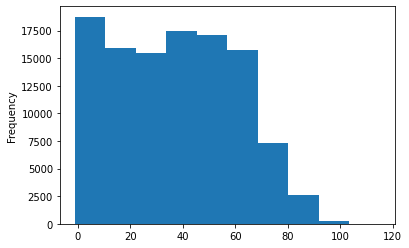

In [ ]:
#Plotting the age distribution for ease of representation and visualisation
my_data['Age'].plot(kind='hist')

In [ ]:
#Getting the minimum and the maximum of the age group
print("Age maximum is ",my_data['Age'].max())
print("Age Minumum is ",my_data['Age'].min())

Age maximum is  115
Age Minumum is  -1


So it seems that there is a problem here, which wasn't expected. So let's make sure of this by printing the number of occurences of each age value in the 'Age' column

In [ ]:
print("Count for each age value:\n",my_data['Age'].value_counts(sort=True))

Count for each age value:
  0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64


In [ ]:
print("Count for each Gender value:\n",my_data['Gender'].value_counts())

Count for each Gender value:
 F    71840
M    38687
Name: Gender, dtype: int64


So there is no problem with the Gender column and we can see that the Female is of value of Gender corresponding to 1 and Males corresponding to 0.


### Data Cleaning
After discussing the structure of the data and any problems that need to be cleaned, perform those cleaning steps in the second part of this section.

 

### Casting the No-show attribute
We have found before that the 'No-show' attribute is of type string, and that we cannot use this in our data analysis model. As we need a quantized representation whether the patient has showed or not. This is known as Categorical Data Representation problem. This is one of the things that need to be taken into account when cleaning our data.

To make it clear, we will give the class of patients who **showed up** a label of **0** and the patients who **did not show up** a label of **1**.

In [ ]:
# # Getting the mask of the patients who showed up
# show = my_data['No-show']=='Yes'
# # Casting those patients and assignning them to a label of 1
# my_data[show]=1
# # Getting the mask of the patients who did not show up
# not_show = my_data['No-show']=='No'
# # Casting those patients and assignning them to a label of 0
# my_data['No-show'][not_show]= 0

In [ ]:
#Now after the casting let's look at the last attribute value counts
print("Count for each No-show value:\n",my_data['No-show'].value_counts())

Count for each No-show value:
 No     88208
Yes    22319
Name: No-show, dtype: int64


No, it is obvious that we cleaned our data.

### Cleaning the wrong ages problem 
So the whole problem with the ages attribute is with the age of -1 or negative ages generally and we can solve this problem by replacing them by 0

In [ ]:
#Get mask of only patients with age < 0
wrong_ages = my_data['Age'] < 0
#Make these ages 0
my_data['Age'][wrong_ages]= 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
#rechecking if everyhing is ok
print("Count for each age value:\n",my_data['Age'].value_counts(sort=True))

Count for each age value:
 0      3540
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64


### Creating the Ages groups
In this section we will divide our ages into groups of the following:
1. "child": people with ages <=10
2. "teen" :people with ages >10 and <=20
3. "adult" :people with ages >20 and <=30
4. "40s" :people with ages >30 and <=40
5. "50s" :people with ages >40 and <=50
6. "retired" : people with ages >50 and <=60
7. "70s": people with ages >60 and <=70
8. "80s":people with ages >70 and <=80
9. "90s":people with ages >90 and <=100
10. "100s":people with ages >100 and <=max
11. "century":

In [ ]:

#Creating the cut points  for our ages groups and their repsective labels
regions = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_groups = ["child","teen","adult","40s", "50s", "retired", "70s", "80s", "90s", "100s", "century"]
#Define min and max values
minimum = my_data['Age'].min()
maximum = my_data['Age'].max()

#create list by adding min and max to cut_points
break_points = [minimum] + regions + [maximum]
print(my_data['Age'].max())
#Dividing the age attribute into groups using cut function of pandas
my_data["Age-Group"] = pd.cut(my_data['Age'], bins = break_points, labels = age_groups, include_lowest = True)
print(pd.value_counts(my_data["Age-Group"]))

115
child      18750
retired    15661
40s        15052
50s        14420
adult      13783
teen       13099
70s        11189
80s         5721
90s         2544
100s         301
century        7
Name: Age-Group, dtype: int64


So now we have divided our ages into 11 groups


<a id='eda'></a>
## Exploratory Data Analysis




### Research Question 1  (Does a certain gender influence whether one shows up to appointments or not?!)

In [ ]:
# run the groupby function to group the data by gender and no-show
show_gender = my_data.groupby(['No-show', 'Gender']).size()
print(show_gender)


No-show  Gender
No       F         57246
         M         30962
Yes      F         14594
         M          7725
dtype: int64


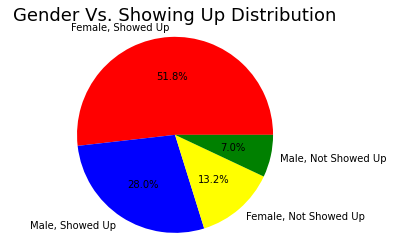

In [ ]:
# Set pie chart properties
labels = 'Female, Showed Up', 'Male, Showed Up', 'Female, Not Showed Up', 'Male, Not Showed Up'
cut_points = [show_gender['No']['F'],show_gender['No']['M'],show_gender['Yes']['F'],show_gender['Yes']['M']]
colors = ['red', 'blue', 'yellow', 'green']

#Set piechart title and axis
fig1, ax = plt.subplots()
ax.pie(cut_points, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Gender Vs. Showing Up Distribution', fontsize= 18)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

#plot piechart
plt.show()


### Research Question 2 (Does certain age group have high influence whether one shows up to appointments or not? If yes, what will it be?)

In [ ]:
# run the groupby function to group the data by age groups and no-show
show_age = my_data.groupby(['No-show', 'Age-Group']).size()
print(show_age)


No-show  Age-Group
No       child        14962
         teen          9791
         adult        10389
         40s          11820
         50s          11550
         retired      12940
         70s           9541
         80s           4832
         90s           2137
         100s           242
         century          4
Yes      child         3788
         teen          3308
         adult         3394
         40s           3232
         50s           2870
         retired       2721
         70s           1648
         80s            889
         90s            407
         100s            59
         century          3
dtype: int64


From the above data, it is obvious that there is a split and that all age groupds are represented in both the show up and the not show up categories. We can plot this to further look into it.
 

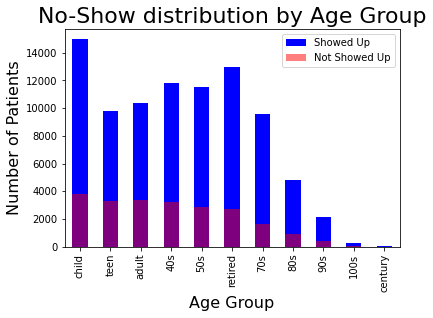

In [ ]:
#plotting the not show up and the showed up by age groups
ax = show_age['No'].plot(kind='bar',color='blue')
show_age['Yes'].plot(ax=ax, color='red',kind='bar',alpha=0.5)
plt.xlabel('Age Group', fontsize= 16)
plt.ylabel('Number of Patients', fontsize=16)
plt.title('No-Show distribution by Age Group', fontsize=22)
plt.legend(('Showed Up','Not Showed Up'),loc="upper right")

# plt.bar(range(len(data)), values, tick_label=names)
plt.show()

### Research Question 3 (Does alcoholic people have higher tendency to show up or not?)


In [ ]:
# run the groupby function to group the data by aloholism and no-show
show_alcohol = my_data.groupby(['No-show', 'Alcoholism']).size()
print(show_alcohol)


No-show  Alcoholism
No       0             85525
         1              2683
Yes      0             21642
         1               677
dtype: int64


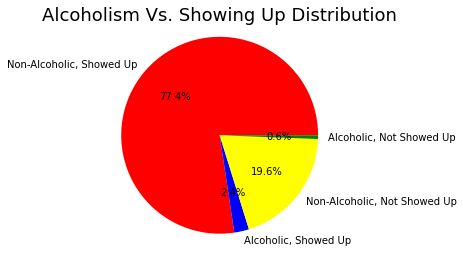

In [ ]:
# Set pie chart properties
labels = 'Non-Alcoholic, Showed Up', 'Alcoholic, Showed Up', 'Non-Alcoholic, Not Showed Up', 'Alcoholic, Not Showed Up'
cut_points = [show_alcohol['No'][0],show_alcohol['No'][1],show_alcohol['Yes'][0],show_alcohol['Yes'][1]]
colors = ['red', 'blue', 'yellow', 'green']

#Set piechart title and axis
fig1, ax = plt.subplots()
ax.pie(cut_points, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Alcoholism Vs. Showing Up Distribution', fontsize= 18)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

#plot piechart
plt.show()

### Research Question 4 (Does Diabetic people show up for their appoinments or not ?)

In [ ]:
# run the groupby function to group the data by aloholism and no-show
show_Diabetes = my_data.groupby(['No-show', 'Diabetes']).size()
print(show_Diabetes)


No-show  Diabetes
No       0           81695
         1            6513
Yes      0           20889
         1            1430
dtype: int64


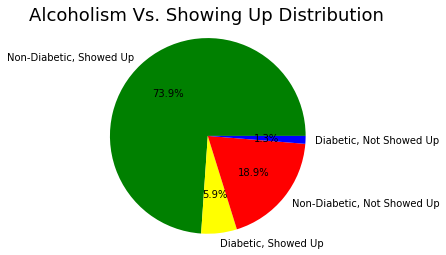

In [ ]:
# Set pie chart properties
labels = 'Non-Diabetic, Showed Up', 'Diabetic, Showed Up', 'Non-Diabetic, Not Showed Up', 'Diabetic, Not Showed Up'
cut_points = [show_Diabetes['No'][0],show_Diabetes['No'][1],show_Diabetes['Yes'][0],show_Diabetes['Yes'][1]]
colors = ['green', 'yellow', 'red', 'blue']

#Set piechart title and axis
fig1, ax = plt.subplots()
ax.pie(cut_points, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Diabetic Vs. Showing Up Distribution', fontsize= 18)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

#plot piechart
plt.show()

<a id='conclusions'></a>
## Conclusions
1. Regarding the first research question:


> Yes, Gender has an influence on showing up for appointments. As seen from the pie graph, females tend- by almost double the percentage- to show up for their appointments with a percentage of 51.8% vs a 28% for males to show up for the appointments.

2. Regarding the second research question:


> This question is a little bit dificult to be answered. But there was a very approximate results. There was no major age group whose percentage of not showing up vs showing up is very steep. 
But let's say that for the children age group the percentage of children who showed up was the highest out of the 11 age groups vs its percentage of not showing up that was approximately equal to other age groups.  

3. Regarding the third research question:


> Yes, Alholism has a major influence on showing up for appointments as can be fairly seen from the figure. As seen from the pie graph, non-alcoholic people tend to show up by almost 77.5% while alcoholic people tend to show up by only 2.5%. 

4. Regarding the fourth reserach question:
 
>  Yes, diabetes has an influence on the showing up for appointments. Non-Diabetic people tend by far large percentage to attend the appointments. Such that 73.9% of people who attended the meetings are non-diabetice, while 5.9% of people who showed up are diabetic. Also, Non-diabetic people were more to not to show up than diabetic people. But the largest percentage was for the showing up was as mentioned non-diabetic.


>
### Limitations
The tests done in this notebook are yet tentative ones, as we didn't use any Machine learning or inferential statisctics whihc would of made things much much accurate and better relations.

## Submitting your Project 



In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255